# Hackathon

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
data = pd.read_excel('Hack_concentraducto_v01.xlsx', sheet_name='Data_Hackathon')
df1 = data.copy()
df1.head()

,tiempo,% Solido Bombeo concentrado_EB,Presión de Descarga_EB_1,Presión de Descarga_EB_2,Presion_Estación de Valvulas_EV1_1,Presion_Estación de Valvulas_EV1_2,Presión_SM-1,Presión_SM-2,Presión estación de valvulas 2_EV2_1,Presión estación de valvulas 2_EV2_2,Porcentaje de Solido Alimentación Espesador,Presión_EDT_1,Presión_EDT_2,Presión_EDT_3,Presión_SM-3,Presión_SM-4
0,2023-01-01 00:00:00,60.305771,-0.663051,1625.289917,3662.116943,3653.241699,16701.179688,3040.474121,3330.878174,3303.286377,59.756073,10653.394531,8614.203125,321.568634,2477.526611,1647.383789
1,2023-01-01 00:03:00,60.316761,-0.663393,1625.912354,3666.185059,3657.404053,16702.007812,3044.661621,3335.265137,3307.434814,59.675354,10658.351562,8619.733398,320.516357,2484.498535,1650.932861
2,2023-01-01 00:06:00,60.327747,-0.663736,1626.534790,3670.252930,3661.566406,16702.835938,3048.849121,3339.652100,3311.583252,59.709515,10658.579102,8621.905273,321.340149,2489.650879,1653.877686
3,2023-01-01 00:09:00,60.338734,-0.664078,1627.157349,3674.321045,3665.728760,16703.664062,3053.036621,3344.039062,3315.731689,59.712528,10663.964844,8622.951172,321.454895,2493.044678,1656.922974
4,2023-01-01 00:12:00,60.350990,-0.664420,1627.779785,3678.389160,3669.891357,16704.492188,3057.224121,3348.426025,3319.880127,59.747906,10667.239258,8625.802734,322.045898,2498.507568,1662.279785


In [3]:
df1.rename(columns=
           {'tiempo': 'T',
            '% Solido  Bombeo concentrado_EB': 'EB%', 
            'Presión de Descarga_EB_1': 'EB1',
            'Presión de Descarga_EB_2': 'EB2',
            'Presion_Estación de Valvulas_EV1_1': 'EV1_1',
            'Presión estación de valvulas 2_EV2_1': 'EV2_1',
            'Presion_Estación de Valvulas_EV1_2': 'EV1_2',
            'Presión estación de valvulas 2_EV2_2': 'EV2_2',
            'Presión_SM-1': 'SM1',
            'Presión_SM-2': 'SM2',
            'Presión_SM-3': 'SM3',
            'Presión_SM-4': 'SM4',
            'Porcentaje de Solido Alimentación Espesador': 'EDT%',
            'Presión_EDT_1': 'EDT1',
            'Presión_EDT_2': 'EDT2',
            'Presión_EDT_3': 'EDT3',
            }
           , inplace=True)
df1


,T,EB%,EB1,EB2,EV1_1,EV1_2,SM1,SM2,EV2_1,EV2_2,EDT%,EDT1,EDT2,EDT3,SM3,SM4
0,2023-01-01 00:00:00,60.305771,-0.663051,1625.289917,3662.116943,3653.241699,16701.179688,3040.474121,3330.878174,3303.286377,59.756073,10653.394531,8614.203125,321.568634,2477.526611,1647.383789
1,2023-01-01 00:03:00,60.316761,-0.663393,1625.912354,3666.185059,3657.404053,16702.007812,3044.661621,3335.265137,3307.434814,59.675354,10658.351562,8619.733398,320.516357,2484.498535,1650.932861
2,2023-01-01 00:06:00,60.327747,-0.663736,1626.534790,3670.252930,3661.566406,16702.835938,3048.849121,3339.652100,3311.583252,59.709515,10658.579102,8621.905273,321.340149,2489.650879,1653.877686
3,2023-01-01 00:09:00,60.338734,-0.664078,1627.157349,3674.321045,3665.728760,16703.664062,3053.036621,3344.039062,3315.731689,59.712528,10663.964844,8622.951172,321.454895,2493.044678,1656.922974
4,2023-01-01 00:12:00,60.350990,-0.664420,1627.779785,3678.389160,3669.891357,16704.492188,3057.224121,3348.426025,3319.880127,59.747906,10667.239258,8625.802734,322.045898,2498.507568,1662.279785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131861,2023-10-31 23:48:00,10.054413,77.797005,1190.481323,5621.594727,5610.148926,13436.262695,5182.274414,4359.650879,4329.630371,61.591667,11111.260742,9140.449219,339.270691,4062.653809,2474.537842
131862,2023-10-31 23:51:00,9.986166,77.747520,1197.906250,5591.877441,5581.366211,13457.138672,5169.184082,4332.559082,4302.140137,61.603802,11088.659180,9143.563477,339.365723,4032.477051,2453.742676
131863,2023-10-31 23:54:00,9.917918,77.698029,1205.331177,5564.079590,5553.806641,13466.647461,5161.661621,4313.277832,4283.791992,61.605499,11074.372070,9116.899414,339.940216,4009.708252,2433.878906
131864,2023-10-31 23:57:00,10.004332,77.648544,1212.756104,5538.140625,5526.818848,13479.273438,5147.319824,4296.933594,4268.665039,61.528542,11060.884766,9114.186523,339.548737,3987.882080,2416.713623


In [4]:
def get_differences(size, column):
 diff_base_line = 5000
 if column == 3:
  diff_base_line = 800
 total_diffs: list = []
 for i in range(1, size):
  current = df1.iloc[i, column]
  prev = df1.iloc[i-1,column]
  diff = abs(current - prev)
  if diff > diff_base_line:
   total_diffs.append([i+2, current, prev, diff])
 return total_diffs

In [5]:
sm1_column = 6 # SM1
eb2_column = 3 # EB_2
rows = len(df1.index)
eb2_diffs = get_differences(rows, eb2_column)
sm1_diffs =get_differences(rows, sm1_column)


In [6]:
eb2_diffs = get_differences(rows, eb2_column)
eb2_diffs

[[1184, 609.03076171875, 2033.62451171875, 1424.59375],
 [2112, 100.7782974243164, 1337.0810546875, 1236.3027572631836],
 [2358, 1599.2152099609375, 593.4012451171875, 1005.81396484375],
 [2387, 57.6052360534668, 1191.353759765625, 1133.7485237121582],
 [3057, 99.3607406616211, 995.4060668945312, 896.0453262329102],
 [8412, 1212.9566650390625, 2341.11328125, 1128.1566162109375],
 [9379, 846.9173583984375, 2242.0048828125, 1395.0875244140625],
 [9413, 667.8895263671875, 2213.764404296875, 1545.8748779296875],
 [9615, 654.5723266601562, 1932.235595703125, 1277.6632690429688],
 [9628, 387.8733215332031, 1714.1708984375, 1326.2975769042969],
 [9629, 1214.3297119140625, 387.8733215332031, 826.4563903808594],
 [9885, 741.9014892578125, 2084.773193359375, 1342.8717041015625],
 [9923, 2142.092041015625, 1322.3465576171875, 819.7454833984375],
 [10721, 1368.1015625, 2498.72265625, 1130.62109375],
 [10722, 548.0328369140625, 1368.1015625, 820.0687255859375],
 [12957, -3.860445976257324, 1419.018

In [7]:
relations: list = []
for val in sm1_diffs:
 row_sm1_id = val[0]
 for val_eb2 in eb2_diffs:
  row_eb2_id = val_eb2[0]
  diff = abs(row_eb2_id-row_sm1_id)   
  if diff < 10:
   relations.append([row_sm1_id, row_eb2_id, diff])


In [8]:
relations

[[9616, 9615, 1],
 [10722, 10721, 1],
 [10722, 10722, 0],
 [14058, 14057, 1],
 [14058, 14059, 1],
 [15413, 15413, 0],
 [18278, 18278, 0],
 [18278, 18282, 4],
 [18282, 18278, 4],
 [18282, 18282, 0],
 [18282, 18289, 7],
 [18289, 18282, 7],
 [18289, 18289, 0],
 [19471, 19471, 0],
 [19489, 19489, 0],
 [19583, 19583, 0],
 [19583, 19588, 5],
 [19719, 19719, 0],
 [20933, 20942, 9],
 [23925, 23924, 1],
 [23925, 23925, 0],
 [25055, 25055, 0],
 [25527, 25526, 1],
 [34795, 34794, 1],
 [34795, 34795, 0],
 [36891, 36891, 0],
 [37134, 37134, 0],
 [38192, 38192, 0],
 [46532, 46527, 5],
 [46532, 46532, 0],
 [46532, 46534, 2],
 [50871, 50871, 0],
 [53873, 53873, 0],
 [54613, 54613, 0],
 [55058, 55057, 1],
 [55058, 55058, 0],
 [55060, 55057, 3],
 [55060, 55058, 2],
 [55506, 55506, 0],
 [55506, 55509, 3],
 [55789, 55789, 0],
 [55790, 55789, 1],
 [55954, 55954, 0],
 [55954, 55956, 2],
 [59494, 59494, 0],
 [61026, 61025, 1],
 [61026, 61026, 0],
 [65278, 65278, 0],
 [72727, 72729, 2],
 [72729, 72729, 0],
 [

In [9]:
from collections import Counter

# Extract the third element of each sublist and store in a separate list
third_elements = [sublist[2] for sublist in relations]

# Use Counter to count occurrences of each element in the third_elements list
counter = Counter(third_elements)

# Print the counts
for element, count in counter.items():
    print(f"Element {element} occurs {count} times in the third position.")


Element 1 occurs 18 times in the third position.
Element 0 occurs 43 times in the third position.
Element 4 occurs 2 times in the third position.
Element 7 occurs 2 times in the third position.
Element 5 occurs 2 times in the third position.
Element 9 occurs 2 times in the third position.
Element 2 occurs 7 times in the third position.
Element 3 occurs 2 times in the third position.
Element 6 occurs 1 times in the third position.


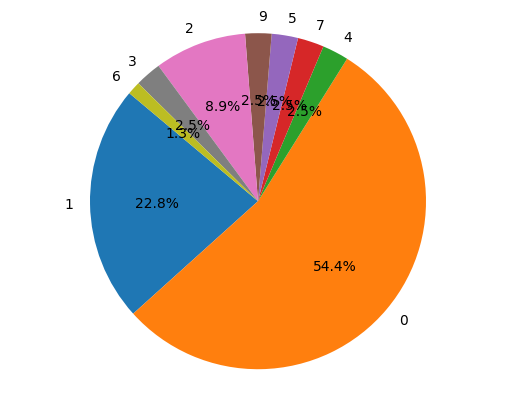

In [10]:
# Prepare data for the pie chart
labels = [str(element) for element in counter.keys()]
sizes = [count for count in counter.values()]

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [11]:
count = 1
for value in df1['EB2']:
 if value < 0:
  count += 1
perc = count/len(df1.index)* 100
perc

34.294662763714676

In [12]:
# Create a boolean mask for rows where 'EB2' is greater than or equal to 0
mask = df1['EB2'] >= 500

# Apply the mask to filter out rows where 'EB2' is less than 0
df1_filtered = df1[mask]

count = 0
for value in df1_filtered['EB2']:
 if value < 0:
  count += 1
count

0

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming df1 is your DataFrame
excluded_columns = ['T']
normalize_columns = [col for col in df1.columns if col not in excluded_columns]

scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df1[normalize_columns]), columns=normalize_columns)
df_normalized = pd.concat([df1[excluded_columns], df_normalized], axis=1)
# 95,16%
# excludes = ['T', 'SM1', 'SM3', 'EV2_1', 'EV2_2', 'SM4', 'EDT1', 'EDT2', 'EDT3', 'EDT%']

# 95,28%
# excludes = ['T', 'SM1', 'SM3','EV1_2', 'EV2_1', 'EV2_2', 'SM4', 'EDT1', 'EDT2', 'EDT3', 'EDT%']

# 95,28%
excludes = ['T', 'SM1', 'SM3','EV1_2', 'EV2_1', 'EV2_2', 'SM4', 'EDT1', 'EDT2', 'EDT3', 'EDT%']

X_1 = df_normalized[df_normalized.columns.difference(excludes)]
y_1 = df_normalized['SM1']
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, random_state=42, test_size=0.4)

# Use Polynomial Kernel without SVR
degree = 4  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Use Linear Regression on polynomial features
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

# Make predictions on polynomial features
y_pred_linear = linear_model.predict(X_test_poly)

r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f'SM1 (Polynomial Kernel): R2 = {r2_linear}, MAE = {mae_linear}')


SM1 (Polynomial Kernel): R2 = 0.9585914033824607, MAE = 0.14586272073253526


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming df1 is your DataFrame
excluded_columns = ['T']
normalize_columns = [col for col in df1.columns if col not in excluded_columns]

scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df1[normalize_columns]), columns=normalize_columns)
df_normalized = pd.concat([df1[excluded_columns], df_normalized], axis=1)
# excludes = ['T', 'SM3', 'EB%', 'EB1', 'EB2', 'SM1','SM2','SM4', 'EDT1', 'EDT2', 'EDT3', 'EDT%']
excludes = ['T', 'SM3', 'EB%', 'EB1', 'EB2', 'SM1','SM2','SM4', 'EDT1', 'EDT2', 'EDT3', 'EDT%']
X_1 = df_normalized[df_normalized.columns.difference(excludes)]
y_1 = df_normalized['SM3']
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, random_state=42, test_size=0.4)

# Use Polynomial Kernel without SVR
degree = 3  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Use Linear Regression on polynomial features
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

# Make predictions on polynomial features
y_pred_linear = linear_model.predict(X_test_poly)

r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f'SM1 (Polynomial Kernel): R2 = {r2_linear}, MAE = {mae_linear}')

SM1 (Polynomial Kernel): R2 = 0.8727047529393764, MAE = 0.25734447809700506
